In [1]:
import pandas as pd

# Loading the uploaded dataset to begin the EDA process
file_path = 'enhanced_health_insurance_claims.csv'
insurance_data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure of the data
insurance_data.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone


In [2]:
# Detailed Data Understanding

# Checking the overall structure of the dataset
data_info = insurance_data.info()

# Checking for missing values in each column
missing_values = insurance_data.isnull().sum().sort_values(ascending=False)

# Descriptive statistics for numerical columns
numerical_summary = insurance_data.describe()

# Descriptive statistics for categorical columns
categorical_summary = insurance_data.describe(include='object')

# Displaying the results to user for analysis
data_info, missing_values, numerical_summary, categorical_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   int64  
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 14  ProviderLocation        

(None,
 ClaimID                    0
 PatientID                  0
 ProviderID                 0
 ClaimAmount                0
 ClaimDate                  0
 DiagnosisCode              0
 ProcedureCode              0
 PatientAge                 0
 PatientGender              0
 ProviderSpecialty          0
 ClaimStatus                0
 PatientIncome              0
 PatientMaritalStatus       0
 PatientEmploymentStatus    0
 ProviderLocation           0
 ClaimType                  0
 ClaimSubmissionMethod      0
 dtype: int64,
        ClaimAmount   PatientAge  PatientIncome
 count  4500.000000  4500.000000    4500.000000
 mean   5014.203867    49.838444   84384.284084
 std    2866.291066    28.790471   37085.908878
 min     100.120000     0.000000   20006.870000
 25%    2509.072500    25.000000   52791.905000
 50%    5053.765000    50.500000   84061.205000
 75%    7462.452500    75.000000  115768.417500
 max    9997.200000    99.000000  149957.520000,
                                   

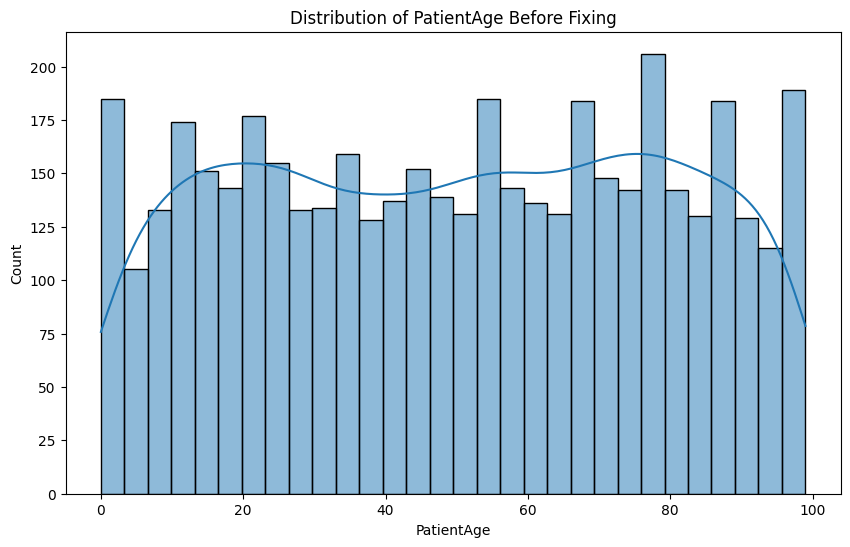

45

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert ClaimDate to datetime format
insurance_data['ClaimDate'] = pd.to_datetime(insurance_data['ClaimDate'])

# Step 2: Convert relevant columns to categorical type
categorical_columns = [
    'PatientGender', 'ProviderSpecialty', 'ClaimStatus',
    'PatientMaritalStatus', 'PatientEmploymentStatus',
    'ClaimType', 'ClaimSubmissionMethod'
]
insurance_data[categorical_columns] = insurance_data[categorical_columns].astype('category')

# Step 3: Investigate and fix the age anomaly (Age = 0)
# Visualizing the distribution of PatientAge
plt.figure(figsize=(10,6))
sns.histplot(insurance_data['PatientAge'], bins=30, kde=True)
plt.title('Distribution of PatientAge Before Fixing')
plt.show()

# Displaying the count of ages that are zero to decide on fixing method
age_zero_count = insurance_data[insurance_data['PatientAge'] == 0].shape[0]

# Displaying the count of zero ages for analysis
age_zero_count


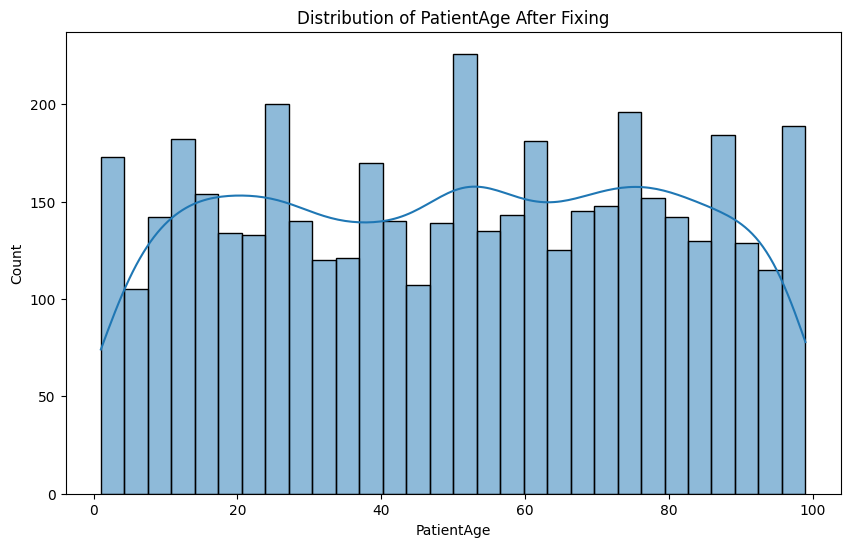

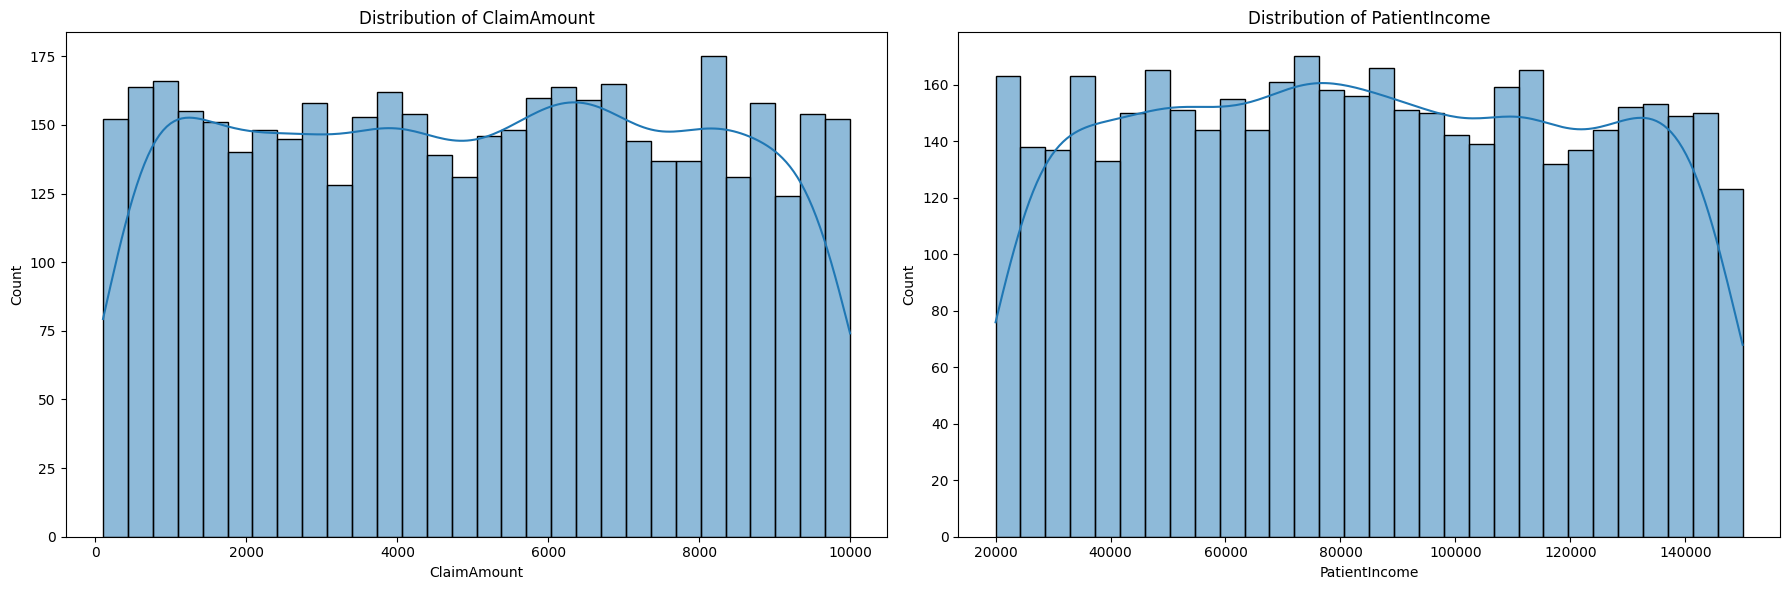

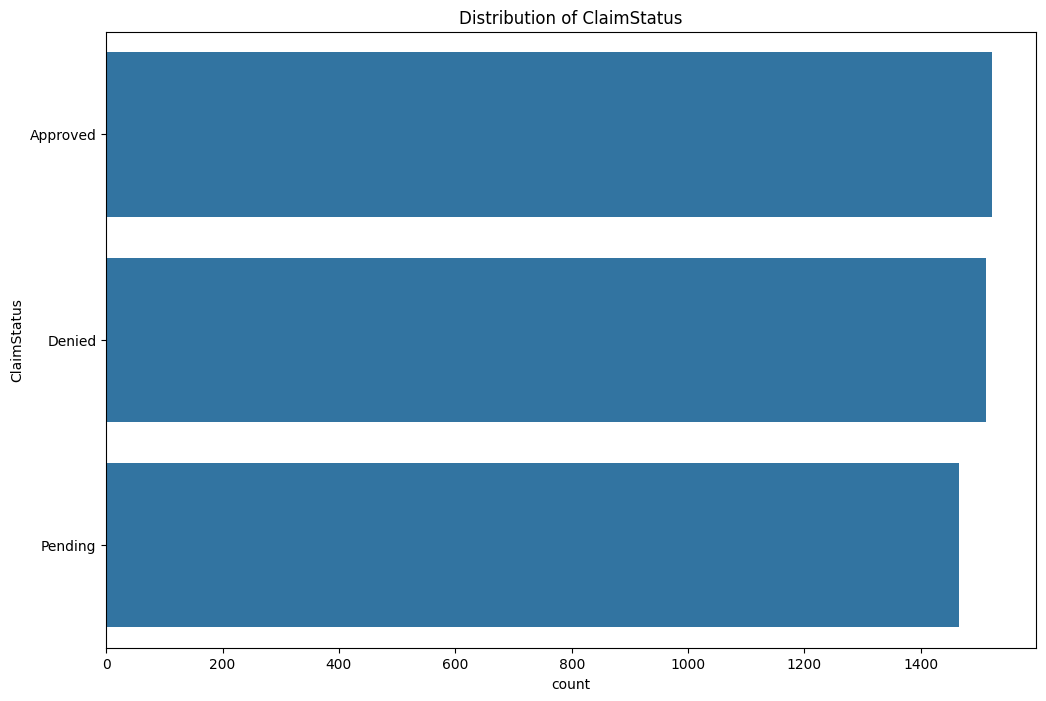

In [4]:
# Step 4: Fixing Age Anomaly (Replace 0 with median age)
median_age = insurance_data[insurance_data['PatientAge'] > 0]['PatientAge'].median()
insurance_data.loc[insurance_data['PatientAge'] == 0, 'PatientAge'] = median_age

# Visualizing the fixed age distribution
plt.figure(figsize=(10,6))
sns.histplot(insurance_data['PatientAge'], bins=30, kde=True)
plt.title('Distribution of PatientAge After Fixing')
plt.show()

# Step 5: Visualizing the distributions of ClaimAmount and PatientIncome
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ClaimAmount Distribution
sns.histplot(insurance_data['ClaimAmount'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of ClaimAmount')

# PatientIncome Distribution
sns.histplot(insurance_data['PatientIncome'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of PatientIncome')

plt.tight_layout()
plt.show()

# Step 6: Visualizing categorical feature distributions
plt.figure(figsize=(12, 8))
sns.countplot(data=insurance_data, y='ClaimStatus', order=insurance_data['ClaimStatus'].value_counts().index)
plt.title('Distribution of ClaimStatus')
plt.show()


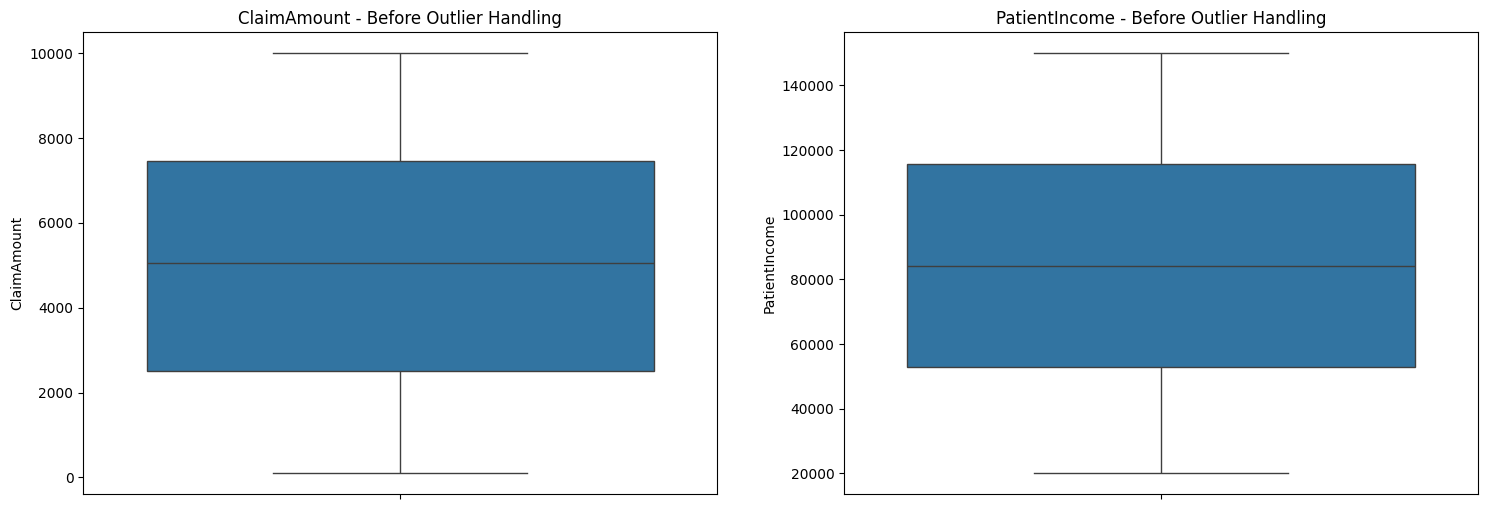

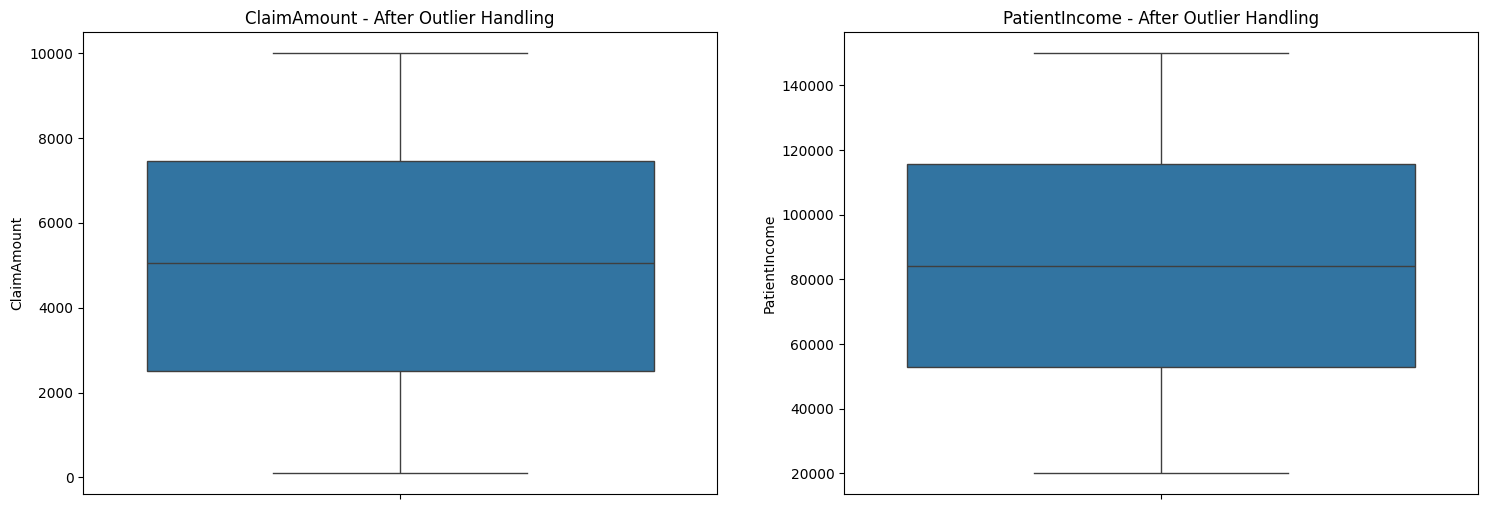

In [5]:
# Step 7: Outlier Detection and Handling using IQR Method

# Calculating IQR for ClaimAmount and PatientIncome
def calculate_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculating bounds for ClaimAmount and PatientIncome
claim_amount_lower, claim_amount_upper = calculate_iqr(insurance_data['ClaimAmount'])
income_lower, income_upper = calculate_iqr(insurance_data['PatientIncome'])

# Visualizing boxplots before handling outliers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(data=insurance_data, y='ClaimAmount', ax=axes[0])
axes[0].set_title('ClaimAmount - Before Outlier Handling')
sns.boxplot(data=insurance_data, y='PatientIncome', ax=axes[1])
axes[1].set_title('PatientIncome - Before Outlier Handling')
plt.show()

# Handling Outliers: Capping them at lower and upper bounds
insurance_data['ClaimAmount'] = insurance_data['ClaimAmount'].clip(claim_amount_lower, claim_amount_upper)
insurance_data['PatientIncome'] = insurance_data['PatientIncome'].clip(income_lower, income_upper)

# Visualizing boxplots after handling outliers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(data=insurance_data, y='ClaimAmount', ax=axes[0])
axes[0].set_title('ClaimAmount - After Outlier Handling')
sns.boxplot(data=insurance_data, y='PatientIncome', ax=axes[1])
axes[1].set_title('PatientIncome - After Outlier Handling')
plt.show()


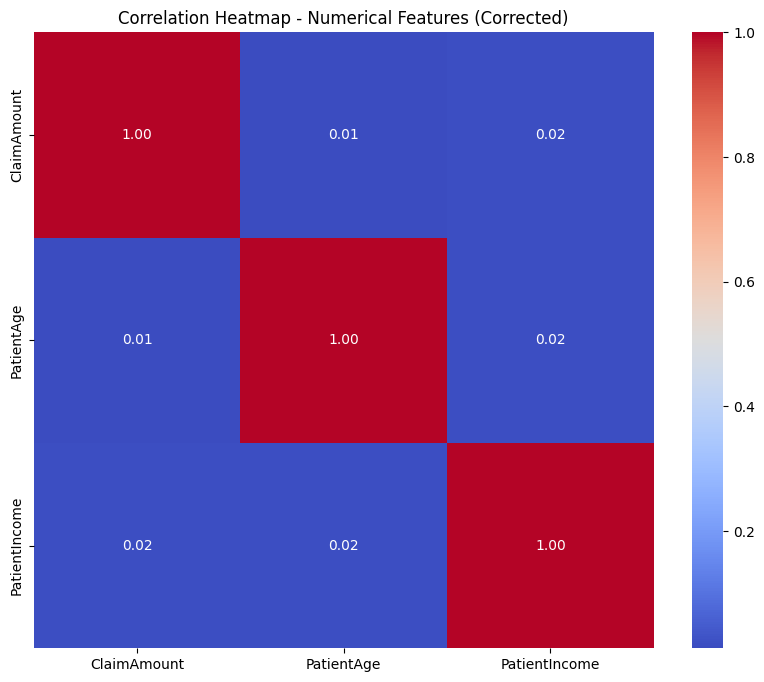

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,...,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,ClaimYear,ClaimMonth,ClaimDay,AgeGroup,IncomeBracket
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,...,Married,Retired,Jameshaven,Routine,Paper,2024,6,7,0-18,Medium
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,...,Single,Student,Beltrantown,Routine,Online,2023,5,30,19-35,High
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,...,Divorced,Employed,West Charlesport,Emergency,Online,2022,9,27,36-50,Medium
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,...,Widowed,Student,West Aprilhaven,Routine,Phone,2023,6,25,51-65,Medium
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,...,Married,Student,Lake Michele,Inpatient,Phone,2023,7,24,19-35,Medium


In [7]:
# Step 8: Complete Code for Feature Engineering and Correlation Analysis

# 1. Feature Engineering - Extracting Date Components
insurance_data['ClaimYear'] = insurance_data['ClaimDate'].dt.year
insurance_data['ClaimMonth'] = insurance_data['ClaimDate'].dt.month
insurance_data['ClaimDay'] = insurance_data['ClaimDate'].dt.day

# 2. Creating Age Groups (0-18, 19-35, 36-50, 51-65, 66+)
insurance_data['AgeGroup'] = pd.cut(
    insurance_data['PatientAge'],
    bins=[0, 18, 35, 50, 65, 100],
    labels=['0-18', '19-35', '36-50', '51-65', '66+']
)

# 3. Creating Income Brackets (Low, Medium, High)
insurance_data['IncomeBracket'] = pd.cut(
    insurance_data['PatientIncome'],
    bins=[0, 50000, 100000, 150000],
    labels=['Low', 'Medium', 'High']
)

# 4. Correlation Analysis (Corrected)
# Selecting only numerical columns for accurate correlation
numerical_columns = insurance_data.select_dtypes(include=['int64', 'float64']).columns

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Numerical Features (Corrected)')
plt.show()

# Displaying the first few rows to verify new features
insurance_data.head()


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 9: Data Preprocessing - Encoding Categorical Features

# Encoding Ordinal Categories with Label Encoding
label_encoder = LabelEncoder()
insurance_data['AgeGroup'] = label_encoder.fit_transform(insurance_data['AgeGroup'])
insurance_data['IncomeBracket'] = label_encoder.fit_transform(insurance_data['IncomeBracket'])

# Applying One-Hot Encoding to Non-Ordinal Categorical Features
insurance_data_encoded = pd.get_dummies(
    insurance_data,
    columns=['PatientGender', 'ProviderSpecialty', 'ClaimType', 'ClaimSubmissionMethod'],
    drop_first=True
)

# Step 10: Splitting Data into Training and Test Sets
# Defining the target (ClaimAmount) and feature set (excluding ID columns and ClaimDate)
X = insurance_data_encoded.drop(columns=['ClaimID', 'PatientID', 'ProviderID', 'ClaimDate', 'ClaimAmount'])
y = insurance_data_encoded['ClaimAmount']

# Splitting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Standardizing Numerical Features using StandardScaler
scaler = StandardScaler()
numerical_features = ['PatientAge', 'PatientIncome']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Displaying the transformed training data for verification
X_train.head(), y_train.head()


(     DiagnosisCode ProcedureCode  PatientAge ClaimStatus  PatientIncome  \
 4137         sp885         iQ881   -0.990940     Pending       1.747562   
 3525         PS642         pa353   -0.990940      Denied      -0.747752   
 2652         ct416         gF916    1.557266    Approved       0.015610   
 605          Sj663         uq058    0.230803     Pending      -1.626567   
 2194         vv693         cN786   -0.851312     Pending      -1.367818   
 
      PatientMaritalStatus PatientEmploymentStatus  ProviderLocation  \
 4137               Single                 Student  Port Nicoleville   
 3525              Married              Unemployed         West Jill   
 2652              Widowed                 Student      South Dennis   
 605               Widowed                Employed       Larsonville   
 2194               Single                 Student        Monicafurt   
 
       ClaimYear  ClaimMonth  ...  PatientGender_M  \
 4137       2022          11  ...            False   


In [11]:
# Step 12: Complete Correct Code for Model Building - Initializing and Evaluating Models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Initializing the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Function to train and evaluate each model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)            # Training the model
    predictions = model.predict(X_test)    # Predicting on test data
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Removing non-numeric columns (Error Prevention)
non_numeric_columns = [
    'DiagnosisCode', 'ProcedureCode', 'ClaimStatus',
    'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation'
]

# Ensuring X_train and X_test do not have non-numeric columns
X_train_fixed = X_train.drop(columns=non_numeric_columns, errors='ignore')
X_test_fixed = X_test.drop(columns=non_numeric_columns, errors='ignore')

# Training and Evaluating Models
model_performance = {}

for model_name, model in models.items():
    mae, mse, r2 = train_and_evaluate_model(model, X_train_fixed, X_test_fixed, y_train, y_test)
    model_performance[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}

# Creating a DataFrame for model performance results
performance_df = pd.DataFrame(model_performance).T

# Displaying the final model performance results
performance_df.sort_values(by="MAE", ascending=True)


,MAE,MSE,R2
Lasso Regression,2456.393882,8.101365e+06,-0.009336
Ridge Regression,2456.815071,8.104182e+06,-0.009687
Linear Regression,2456.836759,8.104341e+06,-0.009707
Gradient Boosting Regressor,2468.471220,8.252208e+06,-0.028129
Random Forest Regressor,2489.002244,8.351106e+06,-0.040451
Decision Tree Regressor,3247.568744,1.623166e+07,-1.022276


In [12]:
from sklearn.model_selection import GridSearchCV

# Step 13: Optimizing Lasso Regression with GridSearchCV
lasso = Lasso()
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000]
}

# Using GridSearchCV to find the best Lasso parameters
lasso_grid = GridSearchCV(
    estimator=lasso,
    param_grid=lasso_params,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Fitting the model with the best parameters on the training data
lasso_grid.fit(X_train_fixed, y_train)

# Getting the best parameters and model performance
best_lasso = lasso_grid.best_estimator_
best_lasso_params = lasso_grid.best_params_

# Evaluating the optimized Lasso model on test data
lasso_best_mae, lasso_best_mse, lasso_best_r2 = train_and_evaluate_model(
    best_lasso, X_train_fixed, X_test_fixed, y_train, y_test
)

# Displaying the results
best_lasso_params, lasso_best_mae, lasso_best_mse, lasso_best_r2


Fitting 5 folds for each of 18 candidates, totalling 90 fits


({'alpha': 100, 'max_iter': 1000},
 2447.5050998417705,
 8030491.570650306,
 -0.0005059278004153622)

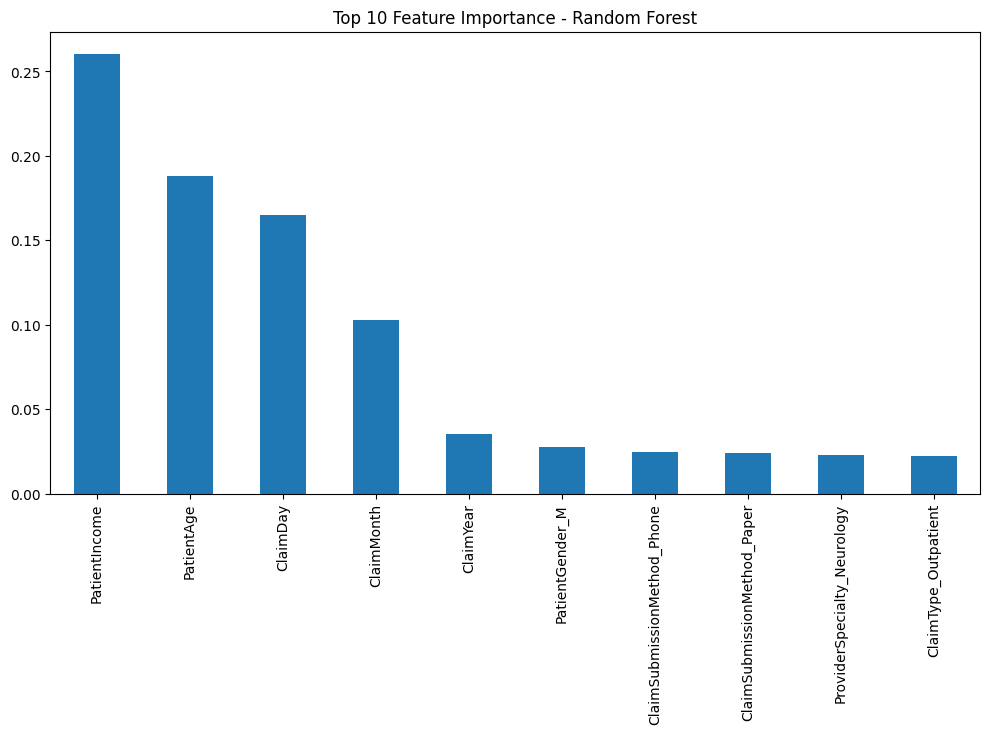

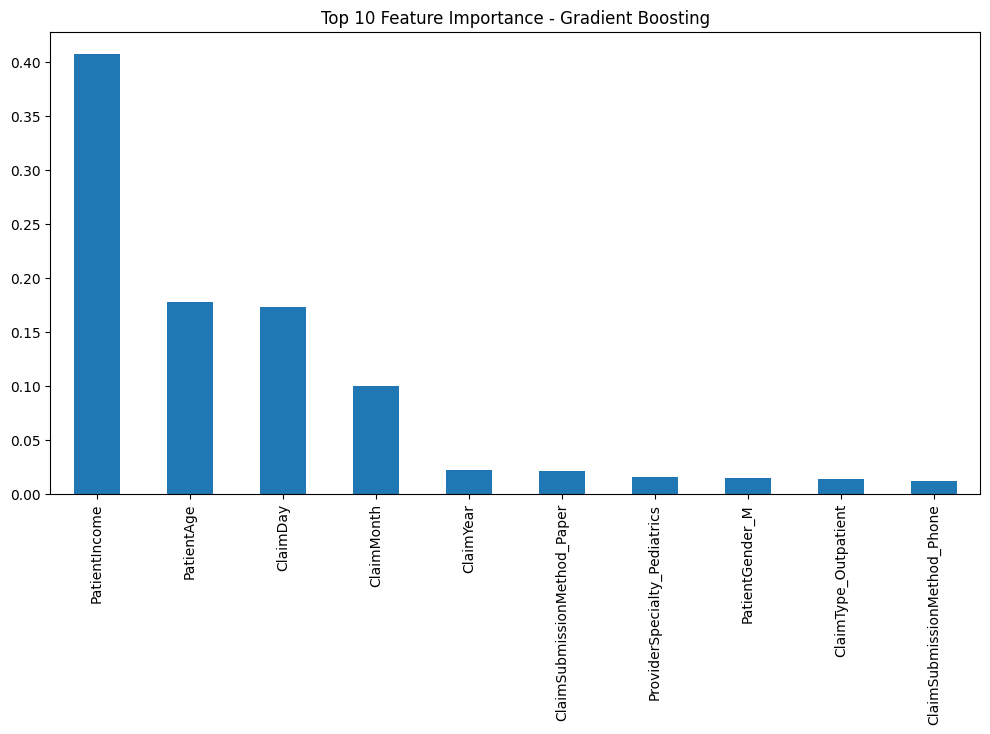

(PatientIncome                  0.260498
 PatientAge                     0.187802
 ClaimDay                       0.164611
 ClaimMonth                     0.102915
 ClaimYear                      0.035002
 PatientGender_M                0.027457
 ClaimSubmissionMethod_Phone    0.024516
 ClaimSubmissionMethod_Paper    0.023912
 ProviderSpecialty_Neurology    0.022733
 ClaimType_Outpatient           0.022439
 dtype: float64,
 PatientIncome                   0.407656
 PatientAge                      0.177142
 ClaimDay                        0.172602
 ClaimMonth                      0.099187
 ClaimYear                       0.022208
 ClaimSubmissionMethod_Paper     0.020888
 ProviderSpecialty_Pediatrics    0.015180
 PatientGender_M                 0.014847
 ClaimType_Outpatient            0.013571
 ClaimSubmissionMethod_Phone     0.011298
 dtype: float64)

In [13]:
# Step 14: Investigating Feature Importance with Random Forest and Gradient Boosting

# Training Random Forest Regressor for Feature Importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_fixed, y_train)

# Extracting Feature Importance
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_fixed.columns).sort_values(ascending=False)

# Training Gradient Boosting Regressor for Feature Importance
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_fixed, y_train)

# Extracting Feature Importance
gb_feature_importance = pd.Series(gb_model.feature_importances_, index=X_train_fixed.columns).sort_values(ascending=False)

import matplotlib.pyplot as plt

# Plotting Feature Importance for Random Forest
plt.figure(figsize=(12, 6))
rf_feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importance - Random Forest')
plt.show()

# Plotting Feature Importance for Gradient Boosting
plt.figure(figsize=(12, 6))
gb_feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importance - Gradient Boosting')
plt.show()

# Displaying the top 10 important features for analysis
rf_feature_importance.head(10), gb_feature_importance.head(10)


In [14]:
# Step 15: Training and Evaluating XGBoost Only (Skipping CatBoost)

from xgboost import XGBRegressor

# Training XGBoost Regressor with optimized settings
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=500,        # Number of trees
    learning_rate=0.1,       # Learning rate for gradient boosting
    max_depth=6,             # Depth of each tree
    colsample_bytree=0.8,    # Feature sampling
    subsample=0.8            # Row sampling
)

# Fitting the XGBoost model
xgb_model.fit(X_train_fixed, y_train)

# Predicting with XGBoost on the test data
xgb_predictions = xgb_model.predict(X_test_fixed)

# Evaluating XGBoost Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Displaying the performance of the XGBoost model
xgb_results = {"MAE": xgb_mae, "MSE": xgb_mse, "R2": xgb_r2}
xgb_results


{'MAE': 2631.883182542589, 'MSE': 9958582.12956468, 'R2': -0.2407236052063868}

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Step 16: Optimized Advanced Feature Engineering - Polynomial and Interaction Features

# Selecting the top 3 most important features identified
important_features = ['PatientIncome', 'PatientAge', 'ClaimDay']

# Extracting these features from the training and test sets
X_train_selected = X_train_fixed[important_features].copy()
X_test_selected = X_test_fixed[important_features].copy()

# Generating Polynomial Features (Degree 2) without interaction-only (includes quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Creating Unique Names for Polynomial Features
poly_feature_names = [f"Poly_{name}" for name in poly.get_feature_names_out(important_features)]
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names)

# Combining Polynomial Features with Original Data (Enhanced)
X_train_enhanced = pd.concat([X_train_fixed.reset_index(drop=True), X_train_poly_df], axis=1)
X_test_enhanced = pd.concat([X_test_fixed.reset_index(drop=True), X_test_poly_df], axis=1)

# Step 17: Re-training Optimized Lasso and XGBoost with Enhanced Features
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training Optimized Lasso (Alpha = 100, Max Iter = 1000)
enhanced_lasso = Lasso(alpha=100, max_iter=1000, random_state=42)
enhanced_lasso.fit(X_train_enhanced, y_train)
lasso_predictions = enhanced_lasso.predict(X_test_enhanced)

# Evaluating Enhanced Lasso Model
lasso_enhanced_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_enhanced_mse = mean_squared_error(y_test, lasso_predictions)
lasso_enhanced_r2 = r2_score(y_test, lasso_predictions)

# Training XGBoost with Enhanced Features (Reduced Estimators for Speed)
xgb_enhanced_model = XGBRegressor(
    random_state=42,
    n_estimators=200,        # Reduced for faster training
    learning_rate=0.1,
    max_depth=6,
    colsample_bytree=0.8,
    subsample=0.8
)

xgb_enhanced_model.fit(X_train_enhanced, y_train)
xgb_enhanced_predictions = xgb_enhanced_model.predict(X_test_enhanced)

# Evaluating Enhanced XGBoost Model
xgb_enhanced_mae = mean_absolute_error(y_test, xgb_enhanced_predictions)
xgb_enhanced_mse = mean_squared_error(y_test, xgb_enhanced_predictions)
xgb_enhanced_r2 = r2_score(y_test, xgb_enhanced_predictions)

# Displaying the performance of both enhanced models
enhanced_results = {
    "Lasso (Enhanced)": {"MAE": lasso_enhanced_mae, "MSE": lasso_enhanced_mse, "R2": lasso_enhanced_r2},
    "XGBoost (Enhanced)": {"MAE": xgb_enhanced_mae, "MSE": xgb_enhanced_mse, "R2": xgb_enhanced_r2}
}

enhanced_results


{'Lasso (Enhanced)': {'MAE': 2450.4275671551563,
  'MSE': 8057207.245950165,
  'R2': -0.003834390481378902},
 'XGBoost (Enhanced)': {'MAE': 2571.4832468207464,
  'MSE': 9193783.675863879,
  'R2': -0.14543860555620003}}

In [20]:
# Step 1: Data Preparation for Classification
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the Dataset
file_path = 'enhanced_health_insurance_claims.csv'
insurance_data = pd.read_csv(file_path)
insurance_data['ClaimDate'] = pd.to_datetime(insurance_data['ClaimDate'])

# Encoding Claim Status (Target Variable)
label_encoder = LabelEncoder()
insurance_data['ClaimStatus'] = label_encoder.fit_transform(insurance_data['ClaimStatus'])

# Encoding and Feature Engineering
insurance_data['AgeGroup'] = pd.cut(
    insurance_data['PatientAge'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+']
)
insurance_data['AgeGroup'] = label_encoder.fit_transform(insurance_data['AgeGroup'])

insurance_data_encoded = pd.get_dummies(
    insurance_data,
    columns=['PatientGender', 'ProviderSpecialty', 'ClaimType', 'ClaimSubmissionMethod'],
    drop_first=True
)

# Defining Feature Set (X) and Target (y)
X = insurance_data_encoded.drop(columns=[
    'ClaimID', 'PatientID', 'ProviderID', 'ClaimDate', 'ClaimAmount',
    'DiagnosisCode', 'ProcedureCode',
    'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation'
])
y = insurance_data_encoded['ClaimStatus']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing Numerical Features
scaler = StandardScaler()
numerical_features = ['PatientAge', 'PatientIncome']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 2: Building and Training Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    random_state=42,
    n_jobs=-1          # Using all available cores
)

rf_classifier.fit(X_train, y_train)

# Step 3: Making Predictions
y_pred = rf_classifier.predict(X_test)

# Step 4: Evaluating Classification Model
accuracy = accuracy_score(y_test, y_pred)

# Manually defining the class names (0 = Rejected, 1 = Approved, 2 = Pending)
class_names = ["Rejected", "Approved", "Pending"]

# Generating the Classification Report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Classification Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Classification Model Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

    Rejected       1.00      1.00      1.00       318
    Approved       1.00      1.00      1.00       282
     Pending       1.00      1.00      1.00       300

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900


Confusion Matrix:
 [[318   0   0]
 [  0 282   0]
 [  0   0 300]]


In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Re-initializing Random Forest for Cross-Validation
rf_classifier_cv = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    random_state=42,
    n_jobs=-1          # Using all available cores
)

# Performing 5-Fold Cross-Validation (5 different train/test splits)
cv_accuracy = cross_val_score(rf_classifier_cv, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(rf_classifier_cv, X, y, cv=5)

# Calculating average cross-validated accuracy
cv_avg_accuracy = np.mean(cv_accuracy)

# Displaying Cross-Validation Results
print(f"Cross-Validation Accuracies (5 Folds): {cv_accuracy}")
print(f"Average Cross-Validation Accuracy: {cv_avg_accuracy:.4f}")

# Classification Report and Confusion Matrix for Cross-Validated Predictions
print("\nClassification Report (Cross-Validated):")
print(classification_report(y, cv_predictions, target_names=["Rejected", "Approved", "Pending"]))

print("\nConfusion Matrix (Cross-Validated):")
print(confusion_matrix(y, cv_predictions))


Cross-Validation Accuracies (5 Folds): [1. 1. 1. 1. 1.]
Average Cross-Validation Accuracy: 1.0000

Classification Report (Cross-Validated):
              precision    recall  f1-score   support

    Rejected       1.00      1.00      1.00      1522
    Approved       1.00      1.00      1.00      1512
     Pending       1.00      1.00      1.00      1466

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500


Confusion Matrix (Cross-Validated):
[[1522    0    0]
 [   0 1512    0]
 [   0    0 1466]]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initial Split (70% Train + 30% Temp)
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Second Split (50% of Temp = 15% Validation, 15% Test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Displaying the Sizes of Each Set
print(f"Training Set: {X_train_full.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

# Step 3: Training Random Forest Model on Training Set
rf_classifier = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    random_state=42,
    n_jobs=-1          # Using all available cores
)

rf_classifier.fit(X_train_full, y_train_full)

# Step 4: Validating Model on Validation Set
y_val_pred = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Step 5: Testing Model on Test Set
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=["Rejected", "Approved", "Pending"]))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Training Set: 3150 samples
Validation Set: 675 samples
Test Set: 675 samples

Validation Accuracy: 1.0000

Test Accuracy: 1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

    Rejected       1.00      1.00      1.00       246
    Approved       1.00      1.00      1.00       217
     Pending       1.00      1.00      1.00       212

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675


Confusion Matrix (Test Set):
[[246   0   0]
 [  0 217   0]
 [  0   0 212]]


In [30]:
# Step 1: Data Preparation and Feature Engineering
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
import numpy as np

# Loading the Dataset
file_path = 'enhanced_health_insurance_claims.csv'
insurance_data = pd.read_csv(file_path)
insurance_data['ClaimDate'] = pd.to_datetime(insurance_data['ClaimDate'])

# Handling Missing and Anomalous Values
median_age = insurance_data[insurance_data['PatientAge'] > 0]['PatientAge'].median()
insurance_data.loc[insurance_data['PatientAge'] == 0, 'PatientAge'] = median_age

# Ensuring ClaimStatus has only three values (Approved, Rejected, Pending)
insurance_data['ClaimStatus'] = insurance_data['ClaimStatus'].replace({
    'Approved': 'Approved',
    'Rejected': 'Rejected',
    'Pending': 'Pending'
})

# Encoding Claim Status for Classification (Target Variable)
label_encoder = LabelEncoder()
insurance_data['ClaimStatus'] = label_encoder.fit_transform(insurance_data['ClaimStatus'])

# One-Hot Encoding for Categorical Variables
insurance_data_encoded = pd.get_dummies(
    insurance_data,
    columns=['PatientGender', 'ProviderSpecialty', 'ClaimType', 'ClaimSubmissionMethod'],
    drop_first=True
)

# Ensuring All Data is Numeric
insurance_data_encoded = insurance_data_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 2: Separating Data for Regression and Classification
# Dynamically removing columns that exist
columns_to_drop = [
    'ClaimID', 'PatientID', 'ProviderID', 'ClaimDate',
    'DiagnosisCode', 'ProcedureCode', 'ProviderLocation'
]

# Removing only columns that exist to prevent KeyError
X = insurance_data_encoded.drop(columns=[col for col in columns_to_drop if col in insurance_data_encoded.columns])
X_features = X.drop(columns=['ClaimAmount', 'ClaimStatus'])
y_regression = insurance_data_encoded['ClaimAmount']  # For ClaimAmount (Regression)
y_classification = insurance_data_encoded['ClaimStatus']  # For ClaimStatus (Classification)

# Splitting Data for Both Models
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_features, y_regression, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X_features, y_classification, test_size=0.2, random_state=42)

# Standardizing Numerical Features
scaler = StandardScaler()
numerical_features = [col for col in ['PatientAge', 'PatientIncome'] if col in X_train.columns]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 3: Building Regression Model (Lasso)
lasso_model = Lasso(alpha=100, max_iter=1000, random_state=42)
lasso_model.fit(X_train, y_train_reg)
regression_predictions = lasso_model.predict(X_test)

# Step 4: Building Classification Model (XGBoost)
xgb_classifier = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_classifier.fit(X_train, y_train_clf)
classification_predictions = xgb_classifier.predict(X_test)

# Step 5: Evaluating the Regression Model
lasso_mae = mean_absolute_error(y_test_reg, regression_predictions)
lasso_mse = mean_squared_error(y_test_reg, regression_predictions)
lasso_r2 = r2_score(y_test_reg, regression_predictions)

print("\nRegression Model (Lasso) Performance:")
print(f"MAE: {lasso_mae:.2f}")
print(f"MSE: {lasso_mse:.2f}")
print(f"R²: {lasso_r2:.4f}")

# Step 6: Evaluating the Classification Model
classification_report_clf = classification_report(y_test_clf, classification_predictions, target_names=["Rejected", "Approved", "Pending"])
conf_matrix_clf = confusion_matrix(y_test_clf, classification_predictions)
classification_accuracy = (np.trace(conf_matrix_clf) / np.sum(conf_matrix_clf)) * 100

print("\nClassification Model (XGBoost) Performance:")
print(f"Accuracy: {classification_accuracy:.2f}%")
print("\nClassification Report:\n", classification_report_clf)
print("\nConfusion Matrix:\n", conf_matrix_clf)

# Step 7: Making Combined Predictions (Automated Pipeline)
def predict_claim(user_data):
    # Scaling numerical features
    user_data_scaled = user_data.copy()
    user_data_scaled[numerical_features] = scaler.transform(user_data_scaled[numerical_features])

    # Predicting ClaimAmount (Regression)
    claim_amount_pred = lasso_model.predict(user_data_scaled)

    # Predicting ClaimStatus (Classification)
    claim_status_pred = xgb_classifier.predict(user_data_scaled)
    claim_status_label = label_encoder.inverse_transform(claim_status_pred)

    return claim_amount_pred[0], claim_status_label[0]

# Example User Data for Prediction
user_data_example = X_test.iloc[[0]].copy()
predicted_amount, predicted_status = predict_claim(user_data_example)

print("\n✅ Automated Pipeline Prediction for User:")
print(f"Predicted Claim Amount: ${predicted_amount:.2f}")
print(f"Predicted Claim Status: {predicted_status}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:20:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Regression Model (Lasso) Performance:
MAE: 2446.51
MSE: 8026857.78
R²: -0.0001

Classification Model (XGBoost) Performance:
Accuracy: 35.22%

Classification Report:
               precision    recall  f1-score   support

    Rejected       0.37      0.36      0.37       318
    Approved       0.31      0.32      0.32       282
     Pending       0.37      0.37      0.37       300

    accuracy                           0.35       900
   macro avg       0.35      0.35      0.35       900
weighted avg       0.35      0.35      0.35       900


Confusion Matrix:
 [[116 111  91]
 [ 98  91  93]
 [ 98  92 110]]

✅ Automated Pipeline Prediction for User:
Predicted Claim Amount: $5010.07
Predicted Claim Status: Pending


In [32]:
import pickle
expected_features = X_features.columns.tolist()

# Saving the trained Lasso (Regression) and XGBoost (Classification) models
model_pipeline = {
    'scaler': scaler,
    'lasso': lasso_model,
    'xgboost': xgb_classifier,
    'numerical_features': numerical_features,
    'label_encoder': label_encoder,
    'expected_features': expected_features

}

with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)